# Librerias y Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
import datetime
import chardet
from scipy.stats import pointbiserialr

#📌 Extracción

In [2]:
enlace_raw_data = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

In [3]:
acceso = requests.get(enlace_raw_data)
json_nativo = json.loads(acceso.text)
df = pd.DataFrame(json_nativo)
df.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [5]:
df = pd.json_normalize(json_nativo)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:

prefijos = ['customer.', 'phone.', 'internet.', 'account.', 'Charges.']


nombres_actuales = []
nombres_limpios = []


for col in df.columns:
    es_prefijo = False

    for prefijo in prefijos:
        if col.startswith(prefijo):
            nombres_actuales.append(col)
            nombres_limpios.append(col.replace(prefijo, '', 1))
            es_prefijo = True
            break
    if not es_prefijo:
        nombres_actuales.append(col)
        nombres_limpios.append(col)

mapeo_renombre = dict(zip(nombres_actuales, nombres_limpios))

df = df.rename(columns=mapeo_renombre)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
df.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [8]:
columnas_es = [
    'ID_Cliente',
    'Desercion',
    'Genero',
    'Adulto_Mayor',
    'Pareja',
    'Dependientes',
    'Antiguedad_Meses',
    'Servicio_Telefono',
    'Lineas_Multiples',
    'Servicio_Internet',
    'Seguridad_Online',
    'Respaldo_Online',
    'Proteccion_Dispositivo',
    'Soporte_Tecnico',
    'TV_Streaming',
    'Peliculas_Streaming',
    'Tipo_Contrato',
    'Facturacion_Sin_Papel',
    'Metodo_Pago',
    'Cargo_Mensual',
    'Cargo_Total'
]

In [9]:
mapping = dict(zip(df.columns, columnas_es))
df = df.rename(columns=mapping)
df.head()

,ID_Cliente,Desercion,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [10]:
columnas_con_vacios = [
    col for col in df.columns
    if df[col].astype(str).str.strip().eq('').any()
]
print("Columnas con vacíos:", columnas_con_vacios)

Columnas con vacíos: ['Desercion', 'Cargo_Total']


In [11]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [12]:
df['Cargo_Total'] = pd.to_numeric(df['Cargo_Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7267 non-null   object 
 1   Desercion               7043 non-null   object 
 2   Genero                  7267 non-null   object 
 3   Adulto_Mayor            7267 non-null   int64  
 4   Pareja                  7267 non-null   object 
 5   Dependientes            7267 non-null   object 
 6   Antiguedad_Meses        7267 non-null   int64  
 7   Servicio_Telefono       7267 non-null   object 
 8   Lineas_Multiples        7267 non-null   object 
 9   Servicio_Internet       7267 non-null   object 
 10  Seguridad_Online        7267 non-null   object 
 11  Respaldo_Online         7267 non-null   object 
 12  Proteccion_Dispositivo  7267 non-null   object 
 13  Soporte_Tecnico         7267 non-null   object 
 14  TV_Streaming            7267 non-null   

In [13]:
columnas_nulas = df.columns[df.isnull().any()].tolist()
print("Columnas con nulls:", columnas_nulas)

Columnas con nulls: ['Desercion', 'Cargo_Total']


In [14]:
for col in columnas_nulas:
    nulos = df[col].isnull().sum()
    porcentaje = df[col].isnull().mean() * 100

    print(f"Columna: {col}")
    print(f" - Cantidad de nulos: {nulos:,}")
    print(f" - Porcentaje: {porcentaje:.4f}%\n")

Columna: Desercion
 - Cantidad de nulos: 224
 - Porcentaje: 3.0824%

Columna: Cargo_Total
 - Cantidad de nulos: 11
 - Porcentaje: 0.1514%



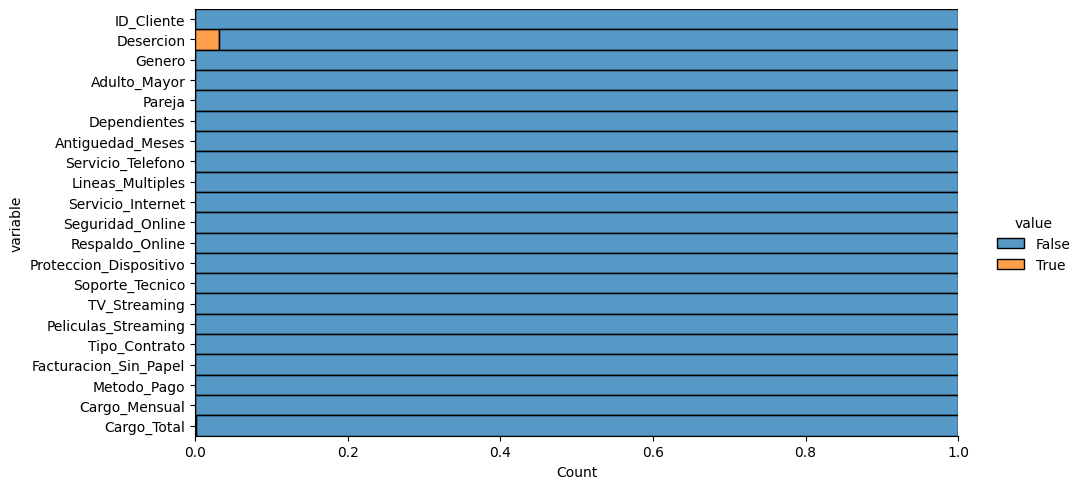

In [15]:
df_validacion = df.isnull().melt()
sns.displot(data=df_validacion, y='variable', hue='value', multiple='fill', aspect=2)
plt.show()

In [16]:
df = df.dropna(subset=['Cargo_Total', 'Desercion'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7032 non-null   object 
 1   Desercion               7032 non-null   object 
 2   Genero                  7032 non-null   object 
 3   Adulto_Mayor            7032 non-null   int64  
 4   Pareja                  7032 non-null   object 
 5   Dependientes            7032 non-null   object 
 6   Antiguedad_Meses        7032 non-null   int64  
 7   Servicio_Telefono       7032 non-null   object 
 8   Lineas_Multiples        7032 non-null   object 
 9   Servicio_Internet       7032 non-null   object 
 10  Seguridad_Online        7032 non-null   object 
 11  Respaldo_Online         7032 non-null   object 
 12  Proteccion_Dispositivo  7032 non-null   object 
 13  Soporte_Tecnico         7032 non-null   object 
 14  TV_Streaming            7032 non-null   objec

In [17]:
df.nunique()

,0
ID_Cliente,7032
Desercion,2
Genero,2
Adulto_Mayor,2
Pareja,2
Dependientes,2
Antiguedad_Meses,72
Servicio_Telefono,2
Lineas_Multiples,3
Servicio_Internet,3


In [18]:
columnas_object = df.select_dtypes(include='object').columns.tolist()
print(columnas_object)

['ID_Cliente', 'Desercion', 'Genero', 'Pareja', 'Dependientes', 'Servicio_Telefono', 'Lineas_Multiples', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Tipo_Contrato', 'Facturacion_Sin_Papel', 'Metodo_Pago']


In [19]:
columnas_object = df.select_dtypes(include='object').columns

for col in columnas_object:
    print(f"\n Columna: {col}")
    print(df[col].value_counts())


 Columna: ID_Cliente
ID_Cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64

 Columna: Desercion
Desercion
No     5163
Yes    1869
Name: count, dtype: int64

 Columna: Genero
Genero
Male      3549
Female    3483
Name: count, dtype: int64

 Columna: Pareja
Pareja
No     3639
Yes    3393
Name: count, dtype: int64

 Columna: Dependientes
Dependientes
No     4933
Yes    2099
Name: count, dtype: int64

 Columna: Servicio_Telefono
Servicio_Telefono
Yes    6352
No      680
Name: count, dtype: int64

 Columna: Lineas_Multiples
Lineas_Multiples
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

 Columna: Servicio_Internet
Servicio_Internet
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

 Columna: Seguridad_Online
Seguridad_Online
No    

In [20]:
cols_texto = ['Metodo_Pago', 'Genero', 'Tipo_Contrato',
              'Pareja', 'Desercion', 'Dependientes',
              'Servicio_Telefono', 'Facturacion_Sin_Papel']

df[cols_texto] = df[cols_texto].apply(
    lambda col: col.astype(str).str.strip()
)

map_traducciones = {
    'Metodo_Pago': {
        'Electronic check': 'Cheque Electrónico',
        'Mailed check': 'Cheque por Correo',
        'Bank transfer (automatic)': 'Transferencia Bancaria',
        'Credit card (automatic)': 'Tarjeta de Crédito'
    },
    'Genero': {
        'Male': 'Masculino',
        'Female': 'Femenino'
    },
    'Tipo_Contrato': {
        'Month-to-month': 'Mensual',
        'Two year': '2 Años',
        'One year': '1 Año'
    }
}

for col, mapa in map_traducciones.items():
    df[col] = df[col].replace(mapa)

df.head()

,ID_Cliente,Desercion,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,No,Femenino,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,1 Año,Yes,Cheque por Correo,65.6,593.30
1,0003-MKNFE,No,Masculino,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Mensual,No,Cheque por Correo,59.9,542.40
2,0004-TLHLJ,Yes,Masculino,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Mensual,Yes,Cheque Electrónico,73.9,280.85
3,0011-IGKFF,Yes,Masculino,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Mensual,Yes,Cheque Electrónico,98.0,1237.85
4,0013-EXCHZ,Yes,Femenino,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Mensual,Yes,Cheque por Correo,83.9,267.40


In [21]:
map_binario = {'No': 0, 'Si': 1, 'Yes': 1}

cols_binarias = [
    'Pareja', 'Desercion', 'Dependientes',
    'Servicio_Telefono', 'Facturacion_Sin_Papel'
]

df[cols_binarias] = (
    df[cols_binarias]
        .replace(map_binario)
        .infer_objects(copy=False)
        .astype('Int64')
)

df.head(2)

/tmp/ipython-input-2148577383.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(map_binario)


,ID_Cliente,Desercion,Genero,Adulto_Mayor,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefono,Lineas_Multiples,Servicio_Internet,...,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargo_Mensual,Cargo_Total
0,0002-ORFBO,0,Femenino,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,1 Año,1,Cheque por Correo,65.6,593.3
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Mensual,0,Cheque por Correo,59.9,542.4


#📊 Carga y análisis

In [22]:
frecuencia_genero = df['Genero'].value_counts()
porcentaje = df['Genero'].value_counts(normalize=True) * 100

resumen = pd.DataFrame({
    'Total': frecuencia_genero,
    'Porcentaje': porcentaje
})

resumen['Total'] = resumen['Total'].apply(lambda x: f'{x:,.0f}')
resumen['Porcentaje'] = resumen['Porcentaje'].apply(lambda x: f'{x:,.2f} %')

resumen

,Total,Porcentaje
Genero,,
Masculino,"3,549",50.47 %
Femenino,"3,483",49.53 %


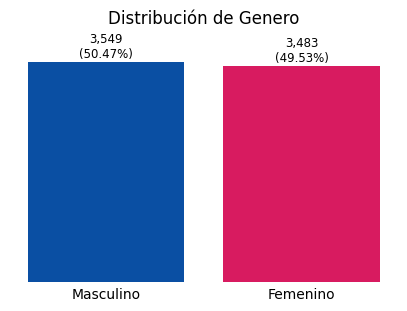

In [23]:
frecuencia_genero = df['Genero'].value_counts()
porcentaje = df['Genero'].value_counts(normalize=True) * 100

colores = ['#0A4FA3', '#d81b60']

fig, ax = plt.subplots(figsize=(5,3))

ax.set_frame_on(False)
ax.tick_params(axis='x', which = 'both', size = 0)

ax.bar(frecuencia_genero.index, frecuencia_genero.values, color=colores)

ax.set_title('Distribución de Genero', pad=20)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(frecuencia_genero.values, porcentaje.values)):
    ax.text(i, total + 30,
            f'{total:,.0f}\n({pct:.2f}%)',
            color='black', fontsize=8.5,
            ha='center', va='bottom')

plt.show()

In [24]:
distribucion_demografico = df['Adulto_Mayor'].value_counts()
porcentajes = df['Adulto_Mayor'].value_counts(normalize=True) * 100

resumen = pd.DataFrame({
    'Total': distribucion_demografico,
    'Porcentaje': porcentajes.round(2)
})

resumen['Porcentaje'] = resumen['Porcentaje'].apply(lambda x: f"{x:,.2f} %")
resumen['Total'] = resumen['Total'].apply(lambda x: f"{x:,.0f}")
resumen.index.name = 'Adulto Mayor'

resumen

,Total,Porcentaje
Adulto Mayor,,
0,"5,890",83.76 %
1,"1,142",16.24 %


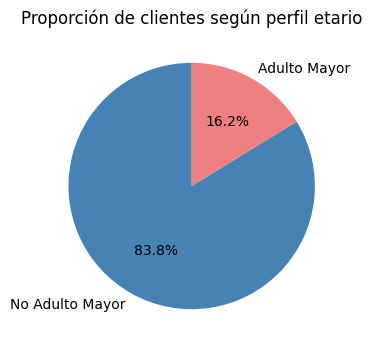

In [25]:
distribucion_demografico = df['Adulto_Mayor'].value_counts()

etiquetas = ['No Adulto Mayor' if x == 0 else 'Adulto Mayor' for x in distribucion_demografico.index]

colores = ['steelblue', 'lightcoral']

plt.figure(figsize=(4,4))
plt.pie(
    distribucion_demografico,
    autopct='%1.1f%%',
    labels=etiquetas,
    colors=colores,
    startangle=90
)

plt.title('Proporción de clientes según perfil etario')

plt.show()

In [26]:
distribucion_socio = df['Pareja'].value_counts()
porcentajes = df['Pareja'].value_counts(normalize=True) * 100

resumen = pd.DataFrame({
    'Total': distribucion_socio,
    'Porcentaje': porcentajes.round(2)
})

resumen['Porcentaje'] = resumen['Porcentaje'].apply(lambda x: f"{x:,.2f} %")
resumen['Total'] = resumen['Total'].apply(lambda x: f"{x:,.0f}")
resumen.index.name = 'Pareja'

resumen

,Total,Porcentaje
Pareja,,
0,"3,639",51.75 %
1,"3,393",48.25 %


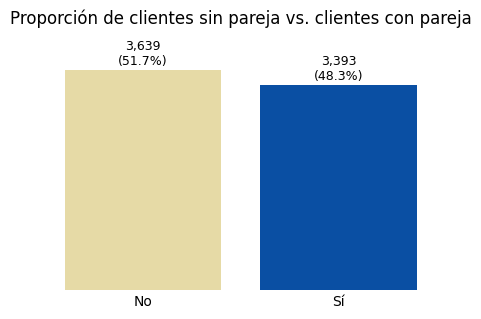

In [27]:
socio = df['Pareja'].value_counts()

socio.index = socio.index.map({0: 'No', 1: 'Sí'})

porcentaje = (socio / socio.sum()) * 100

colores = ['#e6daa6', '#0A4FA3']


fig, ax = plt.subplots(figsize=(5,3))
ax.set_frame_on(False)
ax.tick_params(axis='x', which='both', size=0)

ax.bar(socio.index, socio.values, color=colores)
ax.set_title('Proporción de clientes sin pareja vs. clientes con pareja', pad=25)
ax.set_yticks([])

for i, (total, pct) in enumerate(zip(socio.values, porcentaje.values)):
    ax.text(
        i, total + 30,
        f'{total:,.0f}\n({pct:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.show()

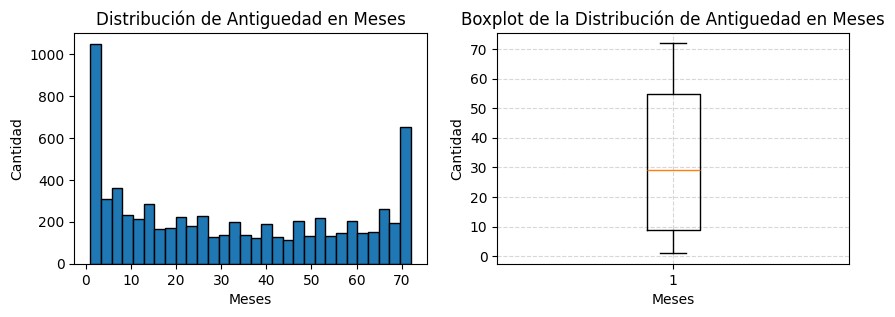

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(df['Antiguedad_Meses'], bins=30, edgecolor="black")
axs[0].set_title('Distribución de Antiguedad en Meses')
axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Cantidad')

axs[1].boxplot(df['Antiguedad_Meses'])
axs[1].set_title('Boxplot de la Distribución de Antiguedad en Meses')
axs[1].set_xlabel('Meses')
axs[1].set_ylabel('Cantidad')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

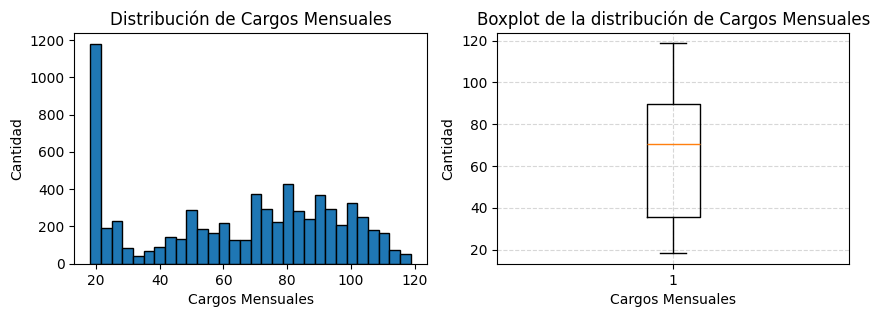

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(df['Cargo_Mensual'], bins=30, edgecolor="black")
axs[0].set_title('Distribución de Cargos Mensuales')
axs[0].set_xlabel('Cargos Mensuales')
axs[0].set_ylabel('Cantidad')

axs[1].boxplot(df['Cargo_Mensual'])
axs[1].set_title('Boxplot de la distribución de Cargos Mensuales')
axs[1].set_xlabel('Cargos Mensuales')
axs[1].set_ylabel('Cantidad')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

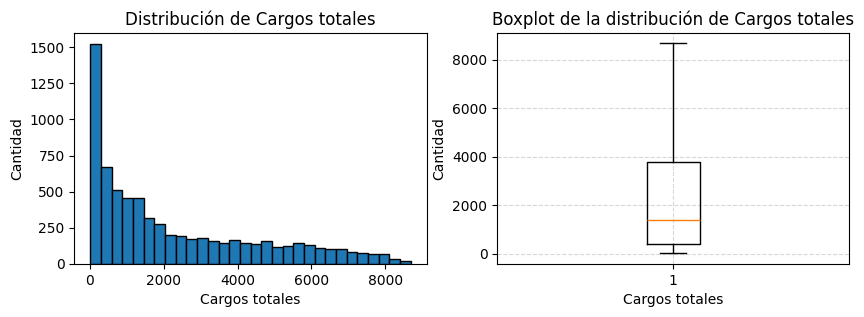

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

axs[0].hist(df['Cargo_Total'], bins=30, edgecolor="black")
axs[0].set_title('Distribución de Cargos totales')
axs[0].set_xlabel('Cargos totales')
axs[0].set_ylabel('Cantidad')

axs[1].boxplot(df['Cargo_Total'])
axs[1].set_title('Boxplot de la distribución de Cargos totales')
axs[1].set_xlabel('Cargos totales')
axs[1].set_ylabel('Cantidad')
axs[1].grid(True, linestyle='--', alpha=0.5)

plt.show()

In [31]:
total = df['Desercion'].value_counts()
total_porcentaje = df['Desercion'].value_counts(normalize=True)*100

resultados = pd.DataFrame({
    'Total': total,
    'Porcentaje': total_porcentaje
})

resultados['Total'] = resultados['Total'].apply(lambda x: f'{x:,.0f}')
resultados['Porcentaje'] = resultados['Porcentaje'].apply(lambda x: f'{x:.1f}%')

resultados.index.name = 'Desercion'

resultados

,Total,Porcentaje
Desercion,,
0,"5,163",73.4%
1,"1,869",26.6%


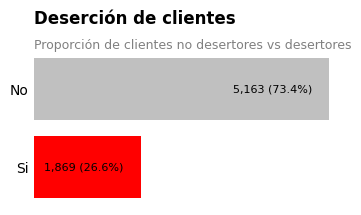

In [35]:
df_churn = (
    df['Desercion']
    .value_counts()
    .rename_axis('Desercion')
    .reset_index(name='Total')
)

df_churn['Desercion'] = df_churn['Desercion'].astype('object')

df_churn['Porcentaje'] = df_churn['Total'] / df_churn['Total'].sum() * 100
df_churn['Desercion'] = df_churn['Desercion'].replace({0: 'No', 1: 'Si'})
df_churn = df_churn.sort_values('Total', ascending=True)

colores = []
for desercion in df_churn['Desercion']:
  if desercion == 'Si':
    colores.append('red')
  else:
    colores.append('silver')


fig, ax = plt.subplots(figsize=(4,2))
ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='y', which='both', size=0)

ax.barh(df_churn['Desercion'],df_churn['Total'], color=colores)
ax.set_title('Deserción de clientes', fontsize=12, weight='bold', pad=20, loc='left')
ax.text(
    0.0, 1.02,
    'Proporción de clientes no desertores vs desertores',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, (total, pct) in enumerate(zip(df_churn['Total'], df_churn['Porcentaje'])):
    ax.text(
        total - 300,
        i,
        f'{total:,.0f} ({pct:.1f}%)',
        va='center',
        ha='right',
        fontsize=8,
        color='black'
    )

fig.savefig('graficos/Distribucion_desercion.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

In [36]:
desertores = df.loc[df['Desercion'] == 1, 'Antiguedad_Meses'].describe()
general = df['Antiguedad_Meses'].describe()

resumen = pd.concat(
    [desertores, general],
    axis=1,
    keys=['Desertores', 'General']
).reset_index().rename(columns={'index': 'Descripción'})


resumen

,Descripción,Desertores,General
0,count,1869.000000,7032.000000
1,mean,17.979133,32.421786
2,std,19.531123,24.545260
3,min,1.000000,1.000000
4,25%,2.000000,9.000000
5,50%,10.000000,29.000000
6,75%,29.000000,55.000000
7,max,72.000000,72.000000


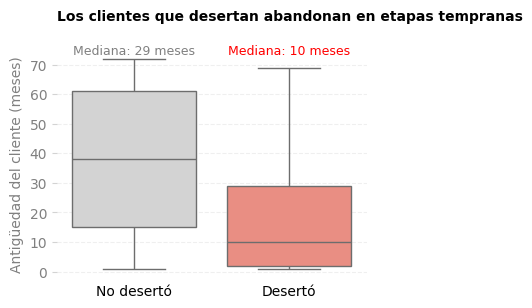

In [37]:
plt.figure(figsize=(4,3))

df['Desercion_label'] = df['Desercion'].map({0: 'No desertó', 1: 'Desertó'})

sns.boxplot(
    data=df,
    x='Desercion_label',
    y='Antiguedad_Meses',
    hue='Desercion_label',
    palette={'No desertó': 'lightgray', 'Desertó': 'salmon'},
    showfliers=False,
    legend=False
)

plt.xticks([0,1], ['No desertó', 'Desertó'])

plt.title(
    'Los clientes que desertan abandonan en etapas tempranas',
    fontsize=10,
    weight='bold',
    loc='left',
    pad=20
)

plt.text(
    0, df['Antiguedad_Meses'].max() * 1.02,
    'Mediana: 29 meses',
    ha='center',
    fontsize=9,
    color='gray'
)

plt.text(
    1, df['Antiguedad_Meses'].max() * 1.02,
    'Mediana: 10 meses',
    ha='center',
    fontsize=9,
    color='red'
)

plt.ylabel('Antigüedad del cliente (meses)', color='gray')
plt.yticks(color='gray')
plt.tick_params(axis='y', color='lightgray')
plt.tick_params(axis='x', color='lightgray', size=0)
plt.xlabel('')

plt.grid(axis='y', linestyle='--', alpha=0.2)
sns.despine(left=True, bottom=True)

plt.show()


In [38]:
corr, p_value = pointbiserialr(
    df['Desercion'],
    df['Antiguedad_Meses']
)

corr, p_value

(np.float64(-0.354049358953251), np.float64(9.437650217577492e-207))

In [39]:
labels = [
    '0–6 meses',
    '7–12 meses',
    '13–24 meses',
    '25–36 meses',
    '37–48 meses',
    '49–72 meses'
]

df['Antiguedad_bin'] = pd.cut(
    df['Antiguedad_Meses'],
    bins=[0, 6, 12, 24, 36, 48, 72],
    labels=labels,
    right=True,
    include_lowest=True
)

churn_rate = (
    df.groupby('Antiguedad_bin', observed=True)['Desercion']
      .mean()
      .reset_index()
)

churn_rate


,Antiguedad_bin,Desercion
0,0–6 meses,0.533333
1,7–12 meses,0.358865
2,13–24 meses,0.287109
3,25–36 meses,0.216346
4,37–48 meses,0.190289
5,49–72 meses,0.095132


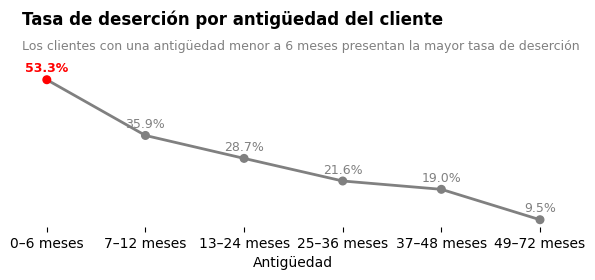

In [40]:
colorMarcador = [
    'red' if tasa == churn_rate['Desercion'].max() else 'gray'
    for tasa in churn_rate['Desercion']
]

fig, ax = plt.subplots(figsize=(7,2))
ax.set_frame_on(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', size=0)

ax.plot(
    churn_rate['Antiguedad_bin'].astype(str),
    churn_rate['Desercion'],
    color='gray',
    linewidth=2,
    zorder=1
)

ax.scatter(
    churn_rate['Antiguedad_bin'].astype(str),
    churn_rate['Desercion'],
    color=colorMarcador,
    s=30,
    zorder=2
)

for _, row in churn_rate.iterrows():
    es_max = row['Desercion'] == churn_rate['Desercion'].max()

    ax.text(
        str(row['Antiguedad_bin']),
        row['Desercion'] + 0.015,
        f"{row['Desercion']:.1%}",
        ha='center',
        va='bottom',
        fontsize=9,
        color='red' if es_max else 'gray',
        fontweight='bold' if es_max else 'normal',
        zorder=3
    )

ax.set_title(
    'Tasa de deserción por antigüedad del cliente',
    pad=35,
    fontsize=12,
    weight='bold',
    loc='left'
)

ax.text(
    0.0, 1.15,
    'Los clientes con una antigüedad menor a 6 meses presentan la mayor tasa de deserción',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

ax.set_ylabel('Tasa de deserción')
ax.set_xlabel('Antigüedad')
ax.grid(axis='y', linestyle='--', alpha=0.2)

fig.savefig('graficos/Antiguedad_Deserción.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

In [41]:
tabla_propension = (
    df.groupby('Adulto_Mayor')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

tabla_propension.index = tabla_propension.index.map({
    0: 'No Adulto Mayor',
    1: 'Adulto Mayor'
})

tabla_propension.columns = ['No Desertó', 'Desertó']

tabla_propension

,No Desertó,Desertó
Adulto_Mayor,,
No Adulto Mayor,0.763497,0.236503
Adulto Mayor,0.583187,0.416813


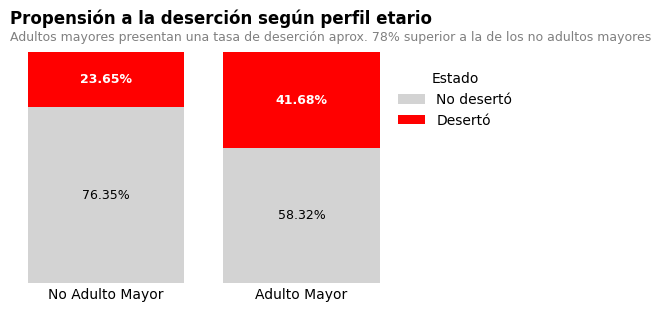

In [42]:
fig, ax = plt.subplots(figsize=(5,3))

no_deserto = tabla_propension['No Desertó']
deserto = tabla_propension['Desertó']

ax.bar(
    tabla_propension.index,
    no_deserto,
    color='lightgray',
    label='No desertó'
)

ax.bar(
    tabla_propension.index,
    deserto,
    bottom=no_deserto,
    color='red',
    label='Desertó'
)


ax.set_frame_on(False)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', size=0)
ax.tick_params(axis='x', which='both', size=0)

ax.set_title(
    'Propensión a la deserción según perfil etario',
    loc='left',
    weight='bold',
    pad=20
)

ax.text(
    0.0, 1.05,
    'Adultos mayores presentan una tasa de deserción aprox. 78% superior a la de los no adultos mayores',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, perfil in enumerate(tabla_propension.index):
    ax.text(
        i,
        no_deserto.iloc[i] + deserto.iloc[i] / 2,
        f'{deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='white',
        weight='bold'
    )

    ax.text(
        i,
        no_deserto.iloc[i] / 2,
        f'{no_deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='black'
    )


ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Estado', frameon=False, bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=1.)

plt.show()

In [43]:
genero_propension = (
    df.groupby('Genero')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

genero_propension.columns = ['No Desertó', 'Desertó']

(
    genero_propension
    .style
    .format('{:.2%}')
    .set_caption('Propensión a la deserción por género')
    .background_gradient(
        subset=['Desertó'],
        cmap='Reds',
        low=0.2,
        high=0.6
    )
    .set_properties(**{
        'text-align': 'center',
        'font-size': '11px'
    })

    .set_table_styles([
        {
            'selector': 'caption',
            'props': [
                ('font-size', '13px'),
                ('font-weight', 'bold'),
                ('text-align', 'left'),
                ('margin-bottom', '10px')
            ]
        },
        {
            'selector': 'th',
            'props': [
                ('background-color', '#f7f7f7'),
                ('font-weight', 'bold'),
                ('text-align', 'center'),
                ('font-size', '11px')
            ]
        },
        {
            'selector': 'td',
            'props': [
                ('border', '1px solid #eeeeee')
            ]
        }
    ])
)


,No Desertó,Desertó
Genero,,
Femenino,73.04%,26.96%
Masculino,73.80%,26.20%


In [44]:
pareja_propension = (
    df.groupby('Pareja')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

pareja_propension.index = pareja_propension.index.map({
    0: 'Sin Pareja',
    1: 'Con Pareja'
})

pareja_propension.columns = ['No Desertó', 'Desertó']

pareja_propension

,No Desertó,Desertó
Pareja,,
Sin Pareja,0.670239,0.329761
Con Pareja,0.802829,0.197171


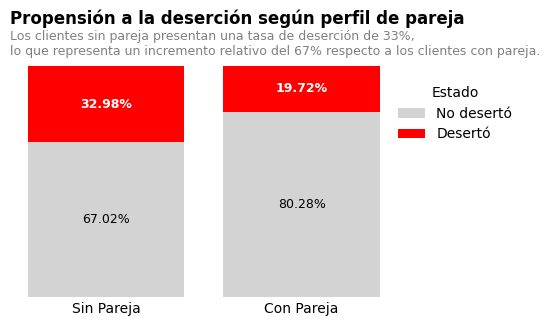

In [45]:
fig, ax = plt.subplots(figsize=(5,3))

no_deserto = pareja_propension['No Desertó']
deserto = pareja_propension['Desertó']

ax.bar(
    pareja_propension.index,
    no_deserto,
    color='lightgray',
    label='No desertó'
)

ax.bar(
    pareja_propension.index,
    deserto,
    bottom=no_deserto,
    color='red',
    label='Desertó'
)

ax.set_frame_on(False)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', size=0)
ax.tick_params(axis='x', which='both', size=0)

ax.set_title(
    'Propensión a la deserción según perfil de pareja',
    loc='left',
    weight='bold',
    pad=30
)

ax.text(
    0.0, 1.05,
    'Los clientes sin pareja presentan una tasa de deserción de 33%,\nlo que representa un incremento relativo del 67% respecto a los clientes con pareja.',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, perfil in enumerate(pareja_propension.index):
    ax.text(
        i,
        no_deserto.iloc[i] + deserto.iloc[i] / 2,
        f'{deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='white',
        weight='bold'
    )

    ax.text(
        i,
        no_deserto.iloc[i] / 2,
        f'{no_deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='black'
    )


ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Estado', frameon=False, bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=1.)

plt.show()


In [46]:
tipoContrato_propension = (
    df.groupby('Tipo_Contrato')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

tipoContrato_propension.columns = ['No Desertó', 'Desertó']

tipoContrato_propension

,No Desertó,Desertó
Tipo_Contrato,,
1 Año,0.887228,0.112772
2 Años,0.971513,0.028487
Mensual,0.572903,0.427097


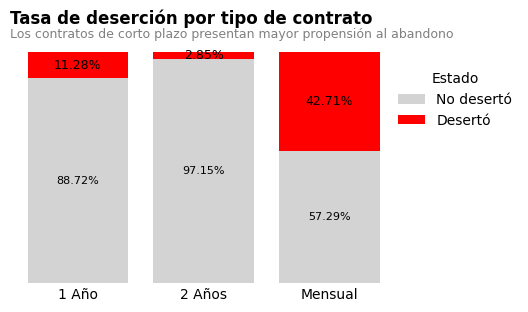

In [48]:
fig, ax = plt.subplots(figsize=(5,3))

no_deserto = tipoContrato_propension['No Desertó']
deserto = tipoContrato_propension['Desertó']

ax.bar(
    tipoContrato_propension.index,
    no_deserto,
    color='lightgray',
    label='No desertó'
)

ax.bar(
    tipoContrato_propension.index,
    deserto,
    bottom=no_deserto,
    color='red',
    label='Desertó'
)

ax.set_frame_on(False)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', size=0)
ax.tick_params(axis='x', which='both', size=0)

ax.set_title(
    'Tasa de deserción por tipo de contrato',
    loc='left',
    weight='bold',
    pad=20
)

ax.text(
    0.0, 1.06,
    'Los contratos de corto plazo presentan mayor propensión al abandono',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, perfil in enumerate(tipoContrato_propension.index):
    ax.text(
        i,
        no_deserto.iloc[i] + deserto.iloc[i] / 2,
        f'{deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='black',
    )

    ax.text(
        i,
        no_deserto.iloc[i] / 2,
        f'{no_deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=8,
        color='black',
    )


ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Estado', frameon=False, bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=1.)

fig.savefig('graficos/TipoContrato_Desercion.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

In [49]:
metodoPago_propension = (
    df.groupby('Metodo_Pago')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

metodoPago_propension.columns = ['No Desertó', 'Desertó']

metodoPago_propension

,No Desertó,Desertó
Metodo_Pago,,
Cheque Electrónico,0.547146,0.452854
Cheque por Correo,0.80798,0.19202
Tarjeta de Crédito,0.847469,0.152531
Transferencia Bancaria,0.832685,0.167315


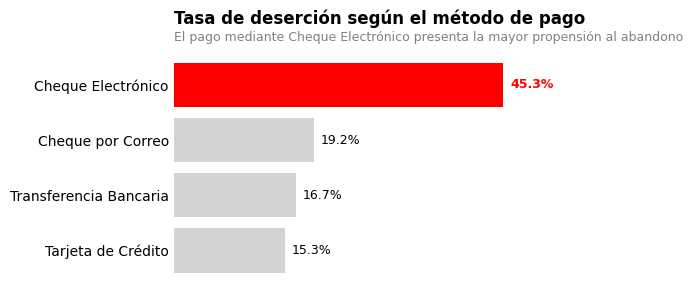

In [50]:
from matplotlib.colors import Normalize
fig, ax = plt.subplots(figsize=(5,3))

deserto = metodoPago_propension['Desertó'].sort_values(ascending=True)

colors = [
    'red' if v == deserto.max() else 'lightgray'
    for v in deserto
]

ax.barh(
    deserto.index,
    deserto.values,
    color=colors
)


ax.set_frame_on(False)
ax.set_xlim(0, deserto.max() + 0.08)

ax.xaxis.set_visible(False)
ax.tick_params(axis='x', which='both', size=0)
ax.tick_params(axis='y', which='both', size=0)

ax.set_title(
    'Tasa de deserción según el método de pago',
    loc='left',
    weight='bold',
    pad=20
)

ax.text(
    0.0, 1.05,
    'El pago mediante Cheque Electrónico presenta la mayor propensión al abandono',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, v in enumerate(deserto.values):
    ax.text(
        v + 0.01,
        i,
        f'{v*100:.1f}%',
        va='center',
        fontsize=9,
        color='red' if v == deserto.max() else 'black',
        weight='bold' if v == deserto.max() else 'normal'
    )


fig.savefig('graficos/MetodoPago_Desercion.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()


In [51]:
servicioInternet_propension = (
    df.groupby('Servicio_Internet')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

servicioInternet_propension.columns = ['No Desertó', 'Desertó']
servicioInternet_propension

,No Desertó,Desertó
Servicio_Internet,,
DSL,0.810017,0.189983
Fiber optic,0.581072,0.418928
No,0.925658,0.074342


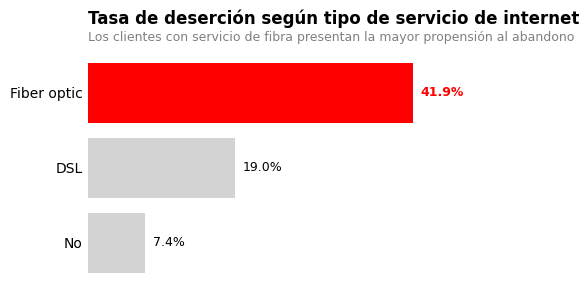

In [52]:
from matplotlib.colors import Normalize
fig, ax = plt.subplots(figsize=(5,3))

deserto = servicioInternet_propension['Desertó'].sort_values(ascending=True)

colors = [
    'red' if v == deserto.max() else 'lightgray'
    for v in deserto
]

ax.barh(
    deserto.index,
    deserto.values,
    color=colors
)

ax.set_frame_on(False)
ax.set_xlim(0, deserto.max() + 0.08)

ax.xaxis.set_visible(False)
ax.tick_params(axis='x', which='both', size=0)
ax.tick_params(axis='y', which='both', size=0)

ax.set_title(
    'Tasa de deserción según tipo de servicio de internet',
    loc='left',
    weight='bold',
    pad=20
)

ax.text(
    0.0, 1.05,
    'Los clientes con servicio de fibra presentan la mayor propensión al abandono',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, v in enumerate(deserto.values):
    ax.text(
        v + 0.01,
        i,
        f'{v*100:.1f}%',
        va='center',
        fontsize=9,
        color='red' if v == deserto.max() else 'black',
        weight='bold' if v == deserto.max() else 'normal'
    )

fig.savefig('graficos/ServicioInternet_Desercion.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

In [53]:
Facturacion_Sin_Papel = (
    df.groupby('Facturacion_Sin_Papel')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

Facturacion_Sin_Papel.index = Facturacion_Sin_Papel.index.map({
    0: 'Física',
    1: 'Electrónica'
})

Facturacion_Sin_Papel.columns = ['No Desertó', 'Desertó']

Facturacion_Sin_Papel

,No Desertó,Desertó
Facturacion_Sin_Papel,,
Física,0.836243,0.163757
Electrónica,0.664107,0.335893


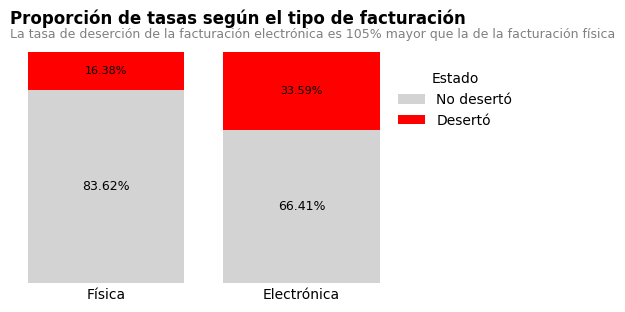

In [54]:
ig, ax = plt.subplots(figsize=(5,3))

no_deserto = Facturacion_Sin_Papel['No Desertó']
deserto = Facturacion_Sin_Papel['Desertó']

ax.bar(
    Facturacion_Sin_Papel.index,
    no_deserto,
    color='lightgray',
    label='No desertó'
)

ax.bar(
    Facturacion_Sin_Papel.index,
    deserto,
    bottom=no_deserto,
    color='red',
    label='Desertó'
)

# Estilo ejecutivo
ax.set_frame_on(False)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', size=0)
ax.tick_params(axis='x', which='both', size=0)

ax.set_title(
    'Proporción de tasas según el tipo de facturación',
    loc='left',
    weight='bold',
    pad=20
)

ax.text(
    0.0, 1.06,
    'La tasa de deserción de la facturación electrónica es 105% mayor que la de la facturación física',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, perfil in enumerate(Facturacion_Sin_Papel.index):
    ax.text(
        i,
        no_deserto.iloc[i] + deserto.iloc[i] / 2,
        f'{deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=8,
        color='black'
    )

    ax.text(
        i,
        no_deserto.iloc[i] / 2,
        f'{no_deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='black'
    )

ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Estado', frameon=False, bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=1.)

plt.show()

In [55]:
soporte_tecnico = (
    df[df['Soporte_Tecnico'] != 'No internet service']
    .groupby('Soporte_Tecnico')['Desercion']
    .value_counts(normalize=True)
    .unstack()
)

soporte_tecnico.index = soporte_tecnico.index.map({
    'No': 'No',
    'Yes': 'Si'
})


soporte_tecnico.columns = ['No Desertó', 'Desertó']
soporte_tecnico

,No Desertó,Desertó
Soporte_Tecnico,,
No,0.583525,0.416475
Si,0.848039,0.151961


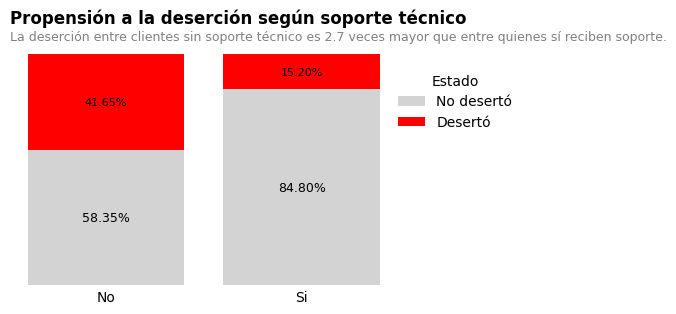

In [56]:
fig, ax = plt.subplots(figsize=(5,3))

no_deserto = soporte_tecnico['No Desertó']
deserto = soporte_tecnico['Desertó']

ax.bar(
    soporte_tecnico.index,
    no_deserto,
    color='lightgray',
    label='No desertó'
)

ax.bar(
    soporte_tecnico.index,
    deserto,
    bottom=no_deserto,
    color='red',
    label='Desertó'
)

ax.set_frame_on(False)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', size=0)
ax.tick_params(axis='x', which='both', size=0)

ax.set_title(
    'Propensión a la deserción según soporte técnico',
    loc='left',
    weight='bold',
    pad=22
)

ax.text(
    0.0, 1.06,
    'La deserción entre clientes sin soporte técnico es 2.7 veces mayor que entre quienes sí reciben soporte.',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, perfil in enumerate(soporte_tecnico.index):
    ax.text(
        i,
        no_deserto.iloc[i] + deserto.iloc[i] / 2,
        f'{deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=8,
        color='black',
    )

    ax.text(
        i,
        no_deserto.iloc[i] / 2,
        f'{no_deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='black'
    )


ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Estado', frameon=False, bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=1.)

plt.show()

In [57]:
Seguridad_Online = (
    df[df['Seguridad_Online'] != 'No internet service']
      .groupby('Seguridad_Online')['Desercion']
      .value_counts(normalize=True)
      .unstack()
)

Seguridad_Online.index = Seguridad_Online.index.map({
    'No': 'No',
    'Yes': 'Si'
})

Seguridad_Online.columns = ['No Desertó', 'Desertó']

Seguridad_Online

,No Desertó,Desertó
Seguridad_Online,,
No,0.582213,0.417787
Si,0.853598,0.146402


In [58]:
Lineas_Multiples = (
    df[df['Lineas_Multiples'] != 'No phone service']
    .groupby('Lineas_Multiples')['Desercion']
    .value_counts(normalize=True)
    .unstack()
)

Lineas_Multiples.index = Lineas_Multiples.index.map({
    'No': 'No',
    'Yes': 'Si'
})


Lineas_Multiples.columns = ['No Desertó', 'Desertó']
Lineas_Multiples

,No Desertó,Desertó
Lineas_Multiples,,
No,0.749188,0.250812
Si,0.713515,0.286485


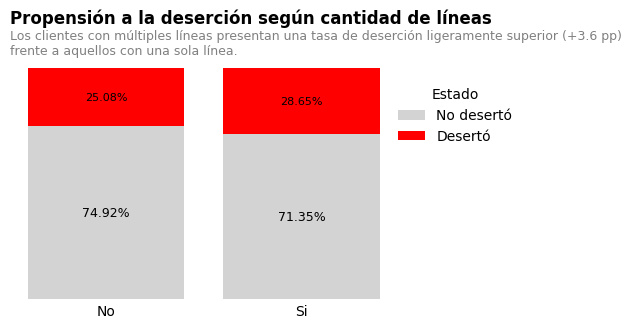

In [59]:
fig, ax = plt.subplots(figsize=(5,3))

no_deserto = Lineas_Multiples['No Desertó']
deserto = Lineas_Multiples['Desertó']

ax.bar(
    Lineas_Multiples.index,
    no_deserto,
    color='lightgray',
    label='No desertó'
)

ax.bar(
    Lineas_Multiples.index,
    deserto,
    bottom=no_deserto,
    color='red',
    label='Desertó'
)


ax.set_frame_on(False)
ax.set_ylim(0, 1)
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', size=0)
ax.tick_params(axis='x', which='both', size=0)

ax.set_title(
    'Propensión a la deserción según cantidad de líneas',
    loc='left',
    weight='bold',
    pad=32
)

ax.text(
    0.0, 1.06,
    'Los clientes con múltiples líneas presentan una tasa de deserción ligeramente superior (+3.6 pp)\nfrente a aquellos con una sola línea.',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for i, perfil in enumerate(Lineas_Multiples.index):
    ax.text(
        i,
        no_deserto.iloc[i] + deserto.iloc[i] / 2,
        f'{deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=8,
        color='black'
    )

    ax.text(
        i,
        no_deserto.iloc[i] / 2,
        f'{no_deserto.iloc[i]*100:.2f}%',
        ha='center',
        va='center',
        fontsize=9,
        color='black'
    )


ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Estado', frameon=False, bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=1.)

plt.show()

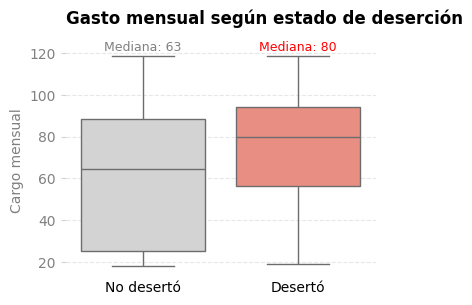

In [60]:
df['Desercion_label'] = df['Desercion'].map({
    0: 'No desertó',
    1: 'Desertó'
})

plt.figure(figsize=(4,3))


sns.boxplot(
    data=df,
    x='Desercion_label',
    y='Cargo_Mensual',
    hue='Desercion_label',
    palette={'No desertó': 'lightgray', 'Desertó': 'salmon'},
    showfliers=False,
    legend=False
)

plt.title(
    'Gasto mensual según estado de deserción',
    loc='left',
    weight='bold',
    pad=15
)

plt.text(
    0, df['Cargo_Mensual'].max() * 1.02,
    'Mediana: 63',
    ha='center',
    fontsize=9,
    color='gray'
)

plt.text(
    1, df['Cargo_Mensual'].max() * 1.02,
    'Mediana: 80',
    ha='center',
    fontsize=9,
    color='red'
)

plt.ylabel('Cargo mensual', color='gray')
plt.tick_params(axis='y', color='lightgray')
plt.yticks(color='gray')
plt.xlabel('')
plt.tick_params(axis='x', color='lightgray', size=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine(left=True, bottom=True)
plt.show()

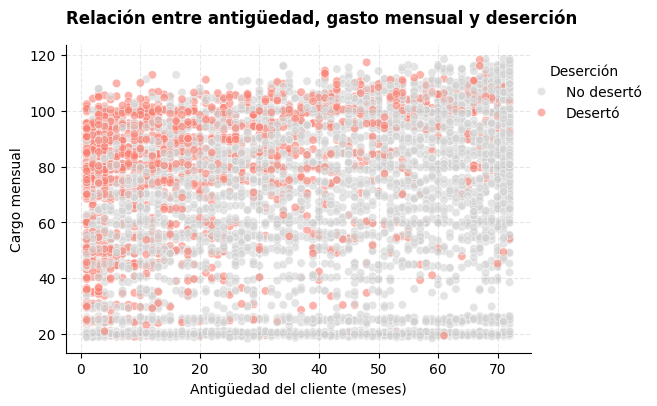

In [61]:
plt.figure(figsize=(6,4))

sns.scatterplot(
    data=df,
    x='Antiguedad_Meses',
    y='Cargo_Mensual',
    hue='Desercion_label',
    palette={'No desertó': 'lightgray', 'Desertó': 'salmon'},
    alpha=0.6
)

plt.title(
    'Relación entre antigüedad, gasto mensual y deserción',
    loc='left',
    weight='bold',
    pad=15
)

plt.xlabel('Antigüedad del cliente (meses)')
plt.ylabel('Cargo mensual')

plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.legend(title='Deserción', frameon=False, bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=1.)
plt.show()

In [62]:
df[['Desercion','Cargo_Total']].corr()

,Desercion,Cargo_Total
Desercion,1.000000,-0.199484
Cargo_Total,-0.199484,1.000000


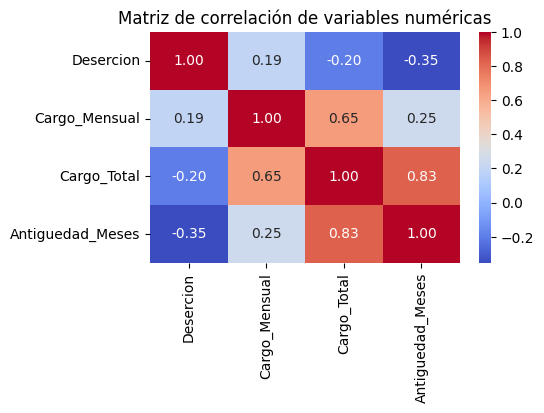

In [63]:
vars_numericas = df[[
    'Desercion',
    'Cargo_Mensual',
    'Cargo_Total',
    'Antiguedad_Meses'
]]

plt.figure(figsize=(5,3))
sns.heatmap(
    vars_numericas.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)

plt.title('Matriz de correlación de variables numéricas')
plt.show()


In [64]:
tenure_contrato_churn = (
    df
    .groupby(['Tipo_Contrato', 'Desercion'])['Antiguedad_Meses']
    .mean()
    .reset_index()
)

tenure_contrato_churn['Desercion_label'] = tenure_contrato_churn['Desercion'].map({
    0: 'No desertó',
    1: 'Desertó'
})

tenure_contrato_churn


,Tipo_Contrato,Desercion,Antiguedad_Meses,Desercion_label
0,1 Año,0,41.705972,No desertó
1,1 Año,1,44.963855,Desertó
2,2 Años,0,56.948687,No desertó
3,2 Años,1,61.270833,Desertó
4,Mensual,0,21.033333,No desertó
5,Mensual,1,14.016918,Desertó


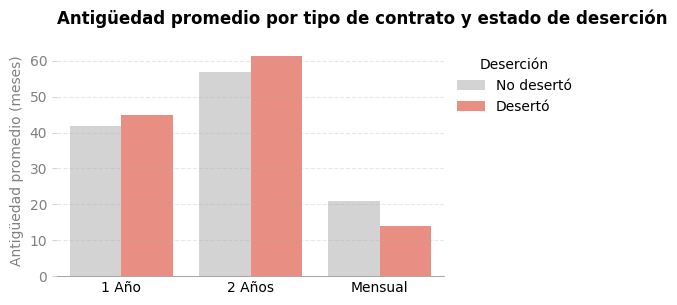

In [65]:
plt.figure(figsize=(5,3))

sns.barplot(
    data=tenure_contrato_churn,
    x='Tipo_Contrato',
    y='Antiguedad_Meses',
    hue='Desercion_label',
    palette={'No desertó': 'lightgray', 'Desertó': 'salmon'}
)

plt.title(
    'Antigüedad promedio por tipo de contrato y estado de deserción',
    loc='left',
    weight='bold',
    pad=15
)

plt.ylabel('Antigüedad promedio (meses)', color='gray')
plt.xlabel('')

plt.legend(
    title='Deserción',
    frameon=False,
    bbox_to_anchor=(1,1),
    loc='upper left'
)

plt.tick_params(axis='x', size=0)
plt.tick_params(axis='y', color='lightgray')
plt.yticks(color='gray')

plt.grid(axis='y', linestyle='--', alpha=0.3)

ax = plt.gca()
sns.despine(left=True, bottom=False)
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(0.5)

plt.show()


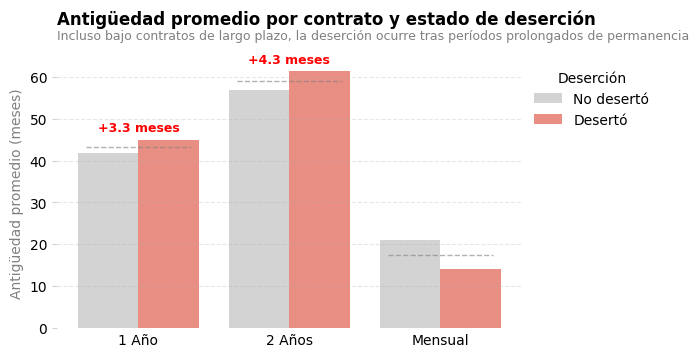

In [66]:
fig, ax = plt.subplots(figsize=(6,3.5))

sns.barplot(
    data=tenure_contrato_churn,
    x='Tipo_Contrato',
    y='Antiguedad_Meses',
    hue='Desercion_label',
    palette={'No desertó': 'lightgray', 'Desertó': 'salmon'},
    ax=ax
)

ax.set_frame_on(False)
ax.tick_params(axis='x', size=0)
ax.tick_params(axis='y', color='lightgray')
ax.yaxis.label.set_color('gray')

ax.set_ylabel('Antigüedad promedio (meses)')
ax.set_xlabel('')

ax.set_title(
    'Antigüedad promedio por contrato y estado de deserción',
    loc='left',
    weight='bold',
    pad=25
)

ax.text(
    0.0, 1.07,
    'Incluso bajo contratos de largo plazo, la deserción ocurre tras períodos prolongados de permanencia',
    transform=ax.transAxes,
    ha='left',
    fontsize=9,
    color='gray'
)

for contrato in tenure_contrato_churn['Tipo_Contrato'].unique():
    media_contrato = (
        tenure_contrato_churn
        .loc[tenure_contrato_churn['Tipo_Contrato'] == contrato, 'Antiguedad_Meses']
        .mean()
    )

    xpos = list(tenure_contrato_churn['Tipo_Contrato'].unique()).index(contrato)

    ax.hlines(
        y=media_contrato,
        xmin=xpos - 0.35,
        xmax=xpos + 0.35,
        colors='gray',
        linestyles='dashed',
        linewidth=1,
        alpha=0.6
    )

for contrato in ['1 Año', '2 Años']:
    subset = tenure_contrato_churn[
        tenure_contrato_churn['Tipo_Contrato'] == contrato
    ]

    no_deserto = subset.loc[subset['Desercion_label'] == 'No desertó', 'Antiguedad_Meses'].values[0]
    deserto = subset.loc[subset['Desercion_label'] == 'Desertó', 'Antiguedad_Meses'].values[0]

    diff = deserto - no_deserto
    xpos = list(tenure_contrato_churn['Tipo_Contrato'].unique()).index(contrato)

    ax.text(
        xpos,
        max(no_deserto, deserto) + 2,
        f'+{diff:.1f} meses',
        ha='center',
        fontsize=9,
        color='red',
        weight='bold'
    )

ax.legend(
    title='Deserción',
    frameon=False,
    bbox_to_anchor=(1,1),
    loc='upper left'
)

ax.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True)

ax = plt.gca()
ax.spines['bottom'].set_color('gray')
ax.spines['bottom'].set_linewidth(0.5)

plt.show()


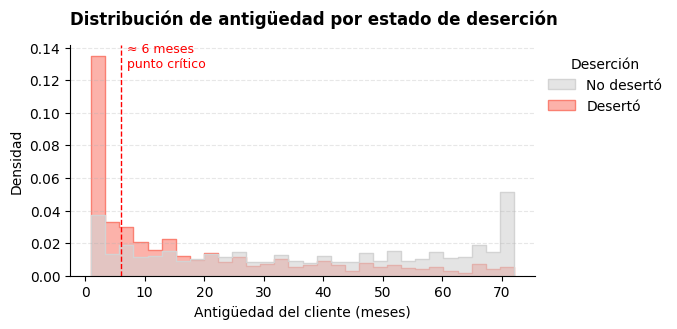

In [67]:
plt.figure(figsize=(6,3))

sns.histplot(
    data=df,
    x='Antiguedad_Meses',
    hue='Desercion_label',
    bins=30,
    stat='density',
    common_norm=False,
    element='step',
    palette={'No desertó': 'lightgray', 'Desertó': 'salmon'},
    alpha=0.6
)

plt.axvline(
    x=6,
    linestyle='--',
    color='red',
    linewidth=1
)

plt.text(
    7, plt.ylim()[1]*0.9,
    '≈ 6 meses\npunto crítico',
    color='red',
    fontsize=9,
    ha='left'
)

plt.title(
    'Distribución de antigüedad por estado de deserción',
    loc='left',
    weight='bold',
    pad=15
)

plt.xlabel('Antigüedad del cliente (meses)')
plt.ylabel('Densidad')

plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
ax = plt.gca()
sns.move_legend(
    ax,
    "upper left",
    bbox_to_anchor=(1,1),
    title="Deserción",
    frameon=False
)

plt.show()

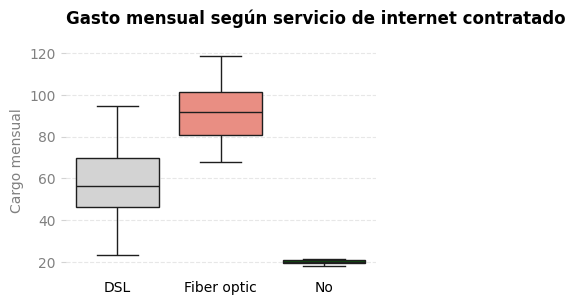

In [68]:
plt.figure(figsize=(4,3))
sns.boxplot(
    data=df,
    x='Servicio_Internet',
    y='Cargo_Mensual',
    hue='Servicio_Internet',
    palette={'DSL': 'lightgray', 'Fiber optic': 'salmon', 'No':'darkgreen'},
    showfliers=False,
    legend=False
)


plt.title(
    'Gasto mensual según servicio de internet contratado',
    loc='left',
    weight='bold',
    pad=15
)

plt.ylabel('Cargo mensual', color='gray')
plt.tick_params(axis='y', color='lightgray')
plt.yticks(color='gray')
plt.xlabel('')
plt.tick_params(axis='x', color='lightgray', size=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine(left=True, bottom=True)
plt.show()

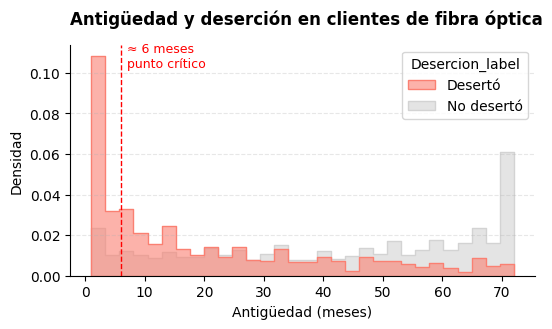

In [69]:
df_fiber = df[df['Servicio_Internet'] == 'Fiber optic']

plt.figure(figsize=(6,3))

sns.histplot(
    data=df_fiber,
    x='Antiguedad_Meses',
    hue='Desercion_label',
    bins=30,
    stat='density',
    common_norm=False,
    element='step',
    palette={'No desertó': 'lightgray', 'Desertó': 'salmon'},
    alpha=0.6
)

plt.axvline(6, linestyle='--', color='red', linewidth=1)
plt.text(7, plt.ylim()[1]*0.9, '≈ 6 meses\npunto crítico', color='red', fontsize=9)

plt.title(
    'Antigüedad y deserción en clientes de fibra óptica',
    loc='left', weight='bold', pad=15
)

plt.xlabel('Antigüedad (meses)')
plt.ylabel('Densidad')

plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.show()

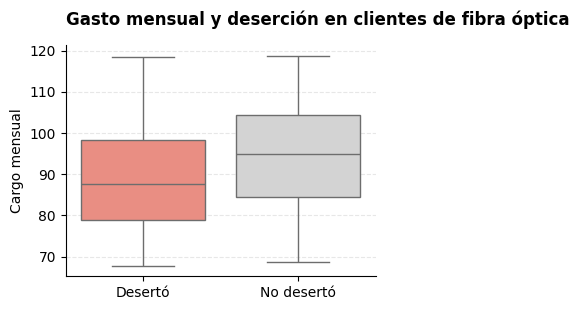

In [70]:
plt.figure(figsize=(4,3))

sns.boxplot(
    data=df_fiber,
    x='Desercion_label',
    y='Cargo_Mensual',
    hue='Desercion_label',
    palette={'No desertó': 'lightgray', 'Desertó': 'salmon'},
    showfliers=False,
    legend=False
)

plt.title(
    'Gasto mensual y deserción en clientes de fibra óptica',
    loc='left', weight='bold', pad=15
)

plt.ylabel('Cargo mensual')
plt.xlabel('')

plt.grid(axis='y', linestyle='--', alpha=0.3)
sns.despine()
plt.show()

#📄Informe final

# Proyecto: Telecom X – Churn de Clientes

---

## 1. Objetivo del análisis

Identificar los factores que impulsan la deserción de clientes en Telecom X mediante un análisis exploratorio de datos (EDA), con el propósito de:

- Reducir la tasa de abandono.
- Priorizar segmentos de alto riesgo.
- Establecer las bases para modelos predictivos de churn.

---

## 2. Resumen ejecutivo

- **Tasa de deserción:** 26.6%, un nivel elevado con impacto directo en ingresos.
- **Momento crítico:** más del 53% del abandono ocurre en los primeros 6 meses.
- **Perfil de alto riesgo:** clientes con baja antigüedad, contrato mensual, facturación electrónica, fibra óptica, sin soporte técnico y adultos mayores.
- **Riesgo financiero:** el churn afecta de manera desproporcionada a clientes con cargos mensuales altos.
- **Variables no relevantes:** el género no muestra diferencias significativas en la propensión al abandono.

 **Conclusión clave:** la deserción sigue patrones definidos relacionados con la experiencia inicial, el tipo de contrato y los servicios contratados.

---

## 3. Perfil general de clientes

### 3.1 Demografía

- **Género:** distribución equilibrada (≈50% hombres / 50% mujeres).
- **Adultos mayores:** 16% de la base, con una tasa de churn 78% superior a la de los no adultos mayores.
- **Convivencia:** ligera mayoría de clientes sin pareja (52%)

### 3.2 Antigüedad

- **Mediana:** 29 meses.
- Distribución bimodal, con concentración en clientes muy nuevos y muy antiguos.
- Amplia dispersión (Q1 = 10 meses, Q3 = 55 meses).

### 3.3 Cargos mensuales

- Base amplia de clientes de bajo consumo.
- Segmento relevante con cargos medios y altos.
- Distribución asimétrica, con mayor concentración hacia valores elevados.

---

## 4. Análisis profundo de deserción

### 4.1 Antigüedad y churn

- **Antigüedad media desertores:** 18 meses vs 32 meses en general.
- **Mediana desertores:** 10 meses.
- Correlación negativa moderada y significativa entre antigüedad y churn.

**Tasa de deserción por tramo de antigüedad:**

| Período | Tasa de Churn |
|---------|---------------|
| 0–6 meses | 53% |
| 7–12 meses | 36% |
| 13–24 meses | 29% |
| ≥48 meses | < 10% |

Superar los primeros 6 meses incrementa notablemente la probabilidad de permanencia.

### 4.2 Factores sociodemográficos

- **Género:** no es un factor diferenciador
- **Adultos mayores:** tasa de deserción del 41.7%
- **Pareja:**
  - Sin pareja: 33% churn.
  - Con pareja: 19.7% churn.

 Los clientes con vínculos familiares muestran mayor estabilidad.

### 4.3 Tipo de contrato

| Tipo de contrato | Tasa de churn |
|------------------|---------------|
| Mensual | 42.7% |
| 1 año | 11.3% |
| 2 años | 2.8% |

Los contratos largos reducen el abandono temprano, aunque el churn reaparece cerca del vencimiento, lo que abre una ventana de retención preventiva.

### 4.4 Método de pago

- **Cheque electrónico:** mayor riesgo de churn (45.3%).
- **Métodos automáticos** (tarjeta / transferencia): menor abandono.

Posible indicador de fricción operativa o menor compromiso del cliente.

### 4.5 Servicios contratados

#### Servicio de Internet

| Servicio | Tasa de churn |
|----------|---------------|
| Fibra óptica | 41.9% |
| DSL | 19.0% |
| Sin internet | 7.4% |

- Fibra óptica combina alto precio con alta deserción
- El abandono ocurre principalmente en los primeros 6 meses.

El problema no es el precio, sino la experiencia inicial (expectativas, instalación, soporte).

#### Servicios adicionales

**Clientes sin soporte técnico:**
- Churn 2.7 veces mayor que quienes sí lo tienen

Los servicios de valor agregado funcionan como anclas de retención.

---

## 5. Análisis financiero del churn

**Cargo mensual:**
- Desertores: mediana ≈ 80
- No desertores: mediana ≈ 63

El churn impacta más en clientes de alto valor mensual.

**Cargo total:** correlación negativa con churn, explicada por menor antigüedad.

**Conclusión financiera**: el abandono temprano de clientes con planes caros representa el mayor riesgo para ingresos futuros.

---

## 6. Insights claves

*   El churn es temprano, predecible y segmentable.
*   Los primeros 6 meses definen la relación con el cliente.
*   La fibra óptica es el producto más crítico desde el punto de vista de churn
* El contrato mensual y la facturación electrónica elevan significativamente el riesgo.
* Los servicios adicionales, especialmente soporte técnico, reducen el abandono.
* El churn afecta más a clientes de alto cargo mensual, amplificando el impacto financiero

---

## 7. Recomendaciones estratégicas

### 7.1 Acciones de corto plazo (operativas)

- Programa de onboarding intensivo en los primeros 90 días.
- Seguimiento proactivo a clientes de fibra óptica.
- Incentivos para migrar de contrato mensual a 1 año.
- Promover métodos de pago automáticos.

### 7.2 Acciones de retención

**Alertas de churn para clientes:**
- < 6 meses.
- Cargo mensual alto.
- Sin soporte técnico.

**Ofertas de renovación** antes del vencimiento contractual.

### 7.3 Data Science

**Variables clave para modelo predictivo:**
- Antigüedad
- Tipo de contrato
- Servicio de internet
- Cargo mensual
- Soporte técnico
- Adulto mayor

---

## 8. Conclusión final

La deserción en Telecom X sigue patrones definidos vinculados con la experiencia inicial, la estructura contractual y los servicios contratados. Intervenir en los primeros meses de relación, especialmente en clientes de alto valor con fibra óptica, constituye la mayor oportunidad para reducir el churn y proteger los ingresos futuros.